# Zomato Data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ZomatoData .csv', lineterminator = '\n')

In [3]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [5]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [6]:
df['name'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 148 entries, 0 to 147
Series name: name
Non-Null Count  Dtype 
--------------  ----- 
148 non-null    object
dtypes: object(1)
memory usage: 1.3+ KB


# Removing the '/5' from rate column

In [7]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

df['rate'] = df['rate'].apply(handleRate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [9]:
df['rate'].describe()

count    148.000000
mean       3.633108
std        0.402271
min        2.600000
25%        3.300000
50%        3.700000
75%        3.900000
max        4.600000
Name: rate, dtype: float64

Our Preprocessing is complete. Now we are going for data visualization

# Data Visualization

In [12]:
sns.set_style('whitegrid')

Text(0.5, 1.0, 'Type of restaurant')

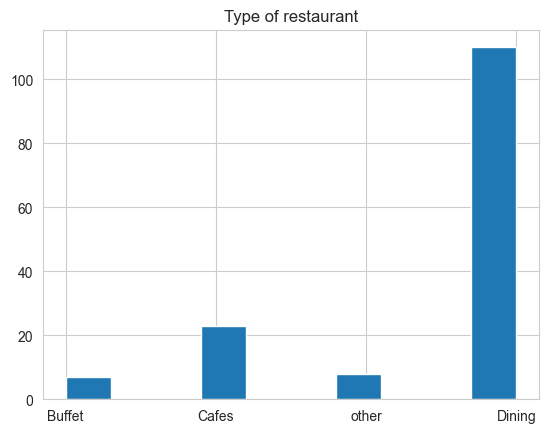

In [13]:
df['listed_in(type)'].hist()
plt.title('Type of restaurant')

Text(0.5, 0, 'Type of restaurant')

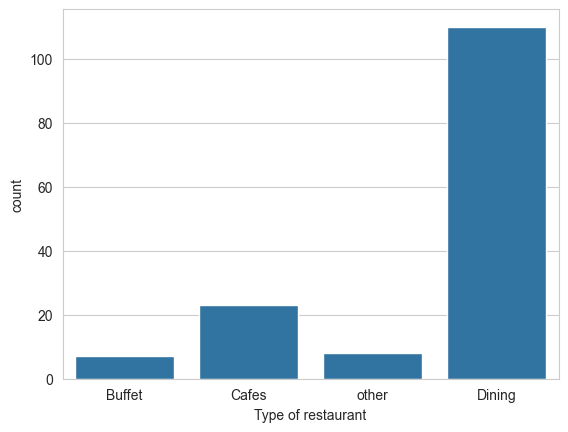

In [17]:
sns.countplot(x = df['listed_in(type)'])
plt.xlabel('Type of restaurant')

conclusion -> majority of the restaurant falls in Dining type restaurant

In [18]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'Votes')

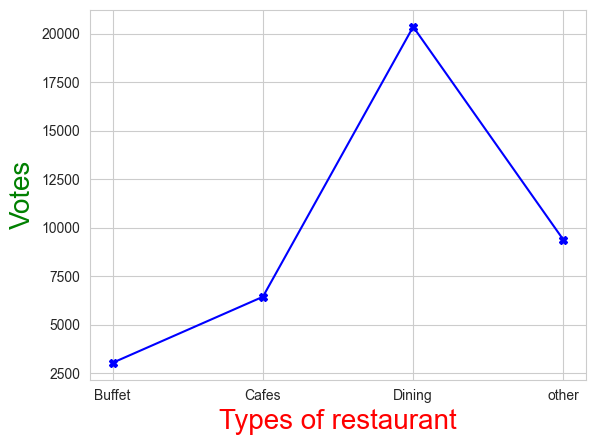

In [22]:
group_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes' : group_data})
plt.plot(result, c="blue" , marker = "X")
plt.xlabel("Types of restaurant", c="red" , size = 20)
plt.ylabel("Votes", c = "green", size = 20)

Dining restaurant has recieved maximum votes

Text(0.5, 1.0, 'Rating Distribution')

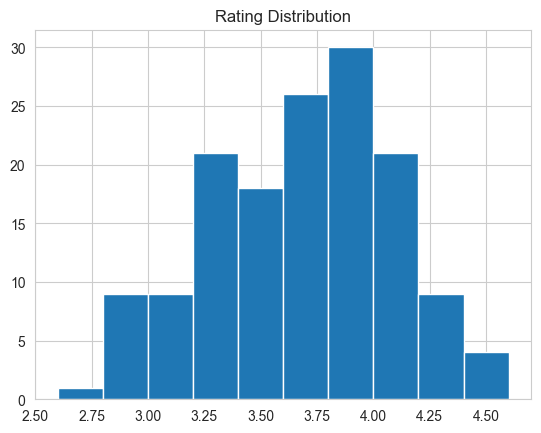

In [24]:
df['rate'].hist()
plt.title("Rating Distribution")

Conclusion - Majority of restaurants has recieved ratings between 3.5 to 4

# Avg. Order spent by a couple online

In [25]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Average Cost of 2 people')

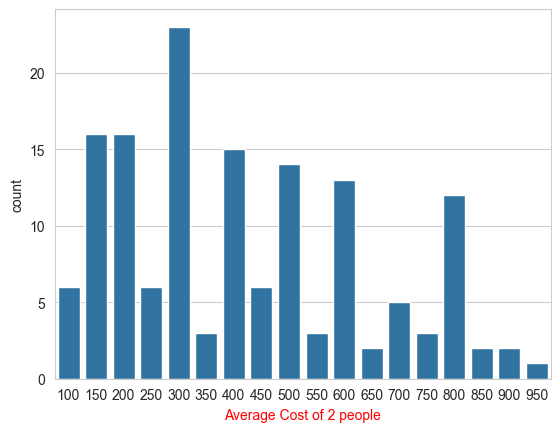

In [32]:
sns.countplot(x = df['approx_cost(for two people)'])
plt.xlabel("Average Cost of 2 people",c = "red")

Conclusion - Average order for 2 people is between 300 and 500

# Maximum rating - online or offline

In [33]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

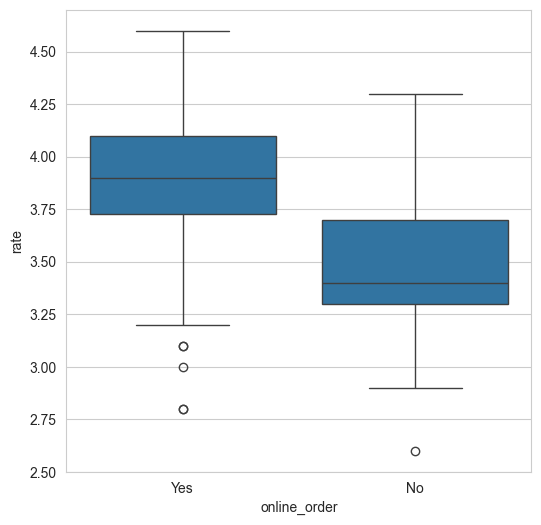

In [34]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order' , y = 'rate' , data = df)

Conclusion - Online orders recieve higher rating as compared to offline orders

# Online orders for type of restaurant

In [35]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


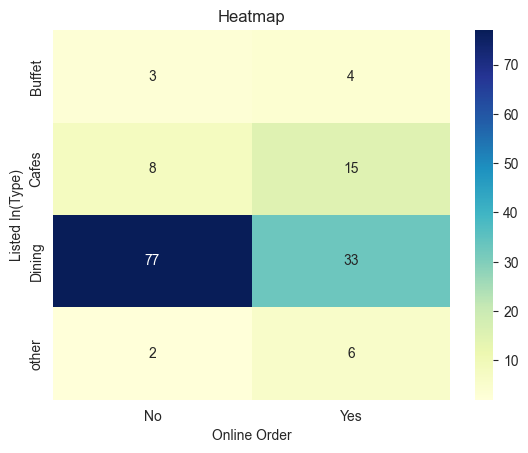

In [38]:
pivot_table= df.pivot_table(index = 'listed_in(type)',columns = 'online_order', aggfunc =  'size', fill_value = 0)
sns.heatmap(pivot_table, annot = True, cmap = "YlGnBu" , fmt = 'd')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In(Type)")
plt.show()

Conclusion - Dining type of restaurant has most offline orders